In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import struct
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams['figure.figsize'] = (20,10)

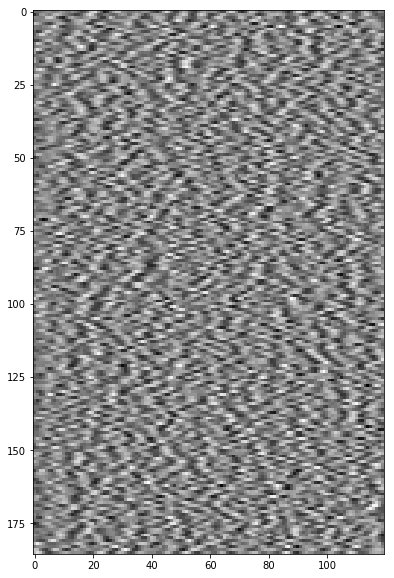

In [28]:
n1_convH = 200
n2_convH = 186
n1 = 150
f1 = 30
n_elems = n1_convH*n2_convH
filename = "/var/tmp/villanueva/AI100_SI/M130_subCF_noise/convH_r150_ensm.rsf@"
f = open(filename,"rb")
convH = np.reshape(struct.unpack('f'*n_elems,f.read(4*n_elems)),(n2_convH,n1_convH))[:,f1:n1]
plt.imshow(convH,cmap='gray')
plt.show()

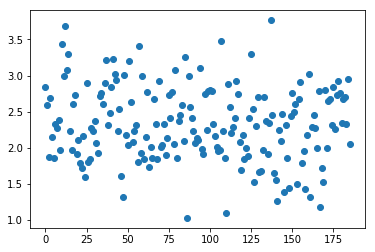

In [6]:
n1 = 186
n2 = 1
n_elems = n1*n2
filename = "/var/tmp/villanueva/AI100_SI/M120_subCFless/sumH_r150_ensm.rsf@"
f = open(filename,"rb")
sumH = np.reshape(struct.unpack('f'*n_elems,f.read(4*n_elems)),(n1,n2))
plt.plot(sumH,'o')
plt.show()

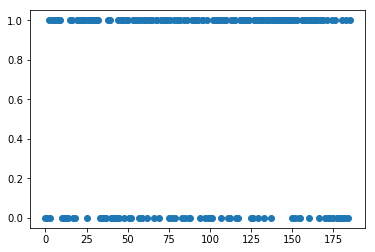

In [32]:
y_todf = np.zeros(sumH.shape)
y_todf = y_todf + (sumH < 2.5).astype(np.int)
plt.plot(y_todf,'o')
plt.show()

In [33]:
from tsfresh import extract_features
from tsfresh.feature_extraction import FeatureExtractionSettings
from tsfresh.utilities.dataframe_functions import impute
extraction_settings = FeatureExtractionSettings()
extraction_settings.IMPUTE = impute

In [34]:
master_df= pd.DataFrame(convH[0])
master_df['id'] = 0
print(master_df.shape)
for ii in range(1,len(convH[:,0])):
    temp_df = pd.DataFrame(convH[ii])
    temp_df['id'] = ii
    master_df = pd.DataFrame(np.vstack([master_df,temp_df]))
print(master_df.tail())


(120, 2)
              0      1
22315  1.434622  185.0
22316  2.628907  185.0
22317  1.895160  185.0
22318 -0.023329  185.0
22319 -1.382766  185.0


In [10]:
%time X = extract_features(master_df,column_id=1,feature_extraction_settings=extraction_settings)
print(X.shape)

Feature Extraction: 100%|██████████| 1/1 [00:14<00:00, 14.49s/it]

CPU times: user 28 ms, sys: 28 ms, total: 56 ms
Wall time: 14.6 s
(186, 222)


In [35]:
y = pd.DataFrame(y_todf)
y.tail()

,0
181,0.0
182,0.0
183,1.0
184,0.0
185,1.0


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

/home/villanueva/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [37]:
cl = DecisionTreeClassifier()
cl.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [38]:
print(classification_report(y_test,cl.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.46      0.43      0.44        14
        1.0       0.68      0.71      0.69        24

avg / total       0.60      0.61      0.60        38



In [39]:
print(y_test.values.ravel())
print(cl.predict(X_test))

[ 1.  0.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.
  0.  1.  0.  0.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  1.  1.  0.  1.
  0.  1.]
[ 0.  0.  1.  0.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.
  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  0.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


In [40]:
X1 = pd.DataFrame(convH)
X1.shape

(186, 120)

In [41]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y,test_size=0.2)

In [42]:
print(y1_test)

       0
173  0.0
65   1.0
2    1.0
32   1.0
37   0.0
73   1.0
120  1.0
21   1.0
96   1.0
10   0.0
117  0.0
124  1.0
44   1.0
135  1.0
118  1.0
168  1.0
146  1.0
77   0.0
136  1.0
181  0.0
105  1.0
88   0.0
129  0.0
50   1.0
111  0.0
142  1.0
15   1.0
9    1.0
30   1.0
6    1.0
112  0.0
170  0.0
106  1.0
138  1.0
171  1.0
122  1.0
176  1.0
23   1.0


In [43]:
cl1 = DecisionTreeClassifier()
cl1.fit(X1_train,y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [44]:
print(classification_report(y1_test,cl1.predict(X1_test)))

             precision    recall  f1-score   support

        0.0       0.35      0.64      0.45        11
        1.0       0.78      0.52      0.62        27

avg / total       0.65      0.55      0.57        38



In [45]:
print(y1_test.values.ravel())
print(cl1.predict(X1_test))

[ 0.  1.  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.  0.
  1.  0.  1.  0.  0.  1.  0.  1.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.
  1.  1.]
[ 0.  1.  1.  0.  1.  1.  0.  0.  1.  0.  0.  1.  0.  0.  1.  1.  0.  0.
  0.  1.  0.  0.  1.  1.  0.  0.  1.  1.  1.  0.  0.  1.  0.  0.  1.  0.
  1.  1.]


In [46]:
from sklearn.ensemble import BaggingClassifier

In [47]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree,n_estimators=150,max_samples=0.8,random_state=1)
bag.fit(X_train,y_train.values.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=150, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

In [48]:
print(classification_report(y_test.values.ravel(),bag.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.67      0.14      0.24        14
        1.0       0.66      0.96      0.78        24

avg / total       0.66      0.66      0.58        38



In [49]:
print(y_test.values.ravel())
print(bag.predict(X_test))

[ 1.  0.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.
  0.  1.  0.  0.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  1.  1.  0.  1.
  0.  1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.
  0.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.]


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model = RandomForestClassifier(n_estimators=150,random_state=0)

In [52]:
model.fit(X_train,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [53]:
print(classification_report(y_test.values.ravel(),model.predict(X_test)))

             precision    recall  f1-score   support

        0.0       0.40      0.14      0.21        14
        1.0       0.64      0.88      0.74        24

avg / total       0.55      0.61      0.54        38



In [54]:
print(y_test.values.ravel())
print(model.predict(X_test))

[ 1.  0.  1.  0.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  0.  1.  1.  1.
  0.  1.  0.  0.  1.  0.  1.  0.  1.  0.  1.  1.  0.  1.  1.  1.  0.  1.
  0.  1.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.
  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.]


In [55]:
print(y.values.ravel()[65:75])
print(model.predict(X)[65:75])

[ 1.  0.  1.  1.  0.  1.  1.  1.  1.  1.]
[ 1.  0.  1.  1.  0.  1.  1.  1.  1.  1.]


In [56]:
print(y[65:75])

      0
65  1.0
66  0.0
67  1.0
68  1.0
69  0.0
70  1.0
71  1.0
72  1.0
73  1.0
74  1.0


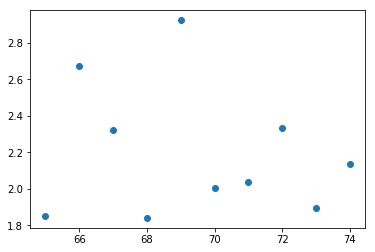

In [57]:
xx1=65
xxn=75
yy = sumH[xx1:xxn]
plt.plot(np.linspace(xx1,xxn-1,len(yy)),yy,'o')
plt.show()

In [433]:
#from sklearn.preprocessing import Imputer

In [437]:
#imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
#imp.fit(X)
#X_imp =
#print(imp.transform(X_comp))

In [435]:
#X_imp_df = pd.DataFrame(X_imp)
#np.any(X_imp_df > np.finfo(np.float32).max)
#X_imp_df[(X_imp_df > np.finfo(np.float32).max).any(axis=1)]

In [283]:
#X_imp_df.iloc[1690][X_imp_df.iloc[1690] > np.finfo(np.float32).max]
#X_imp_df.iloc[1690][32] = 99

In [436]:
#print(np.any(X_imp_df < np.finfo(np.float32).min))
#print(np.any(X_imp_df > np.finfo(np.float32).max))


In [434]:
#plt.plot(model.predict(X_imp_df))
#plt.show()

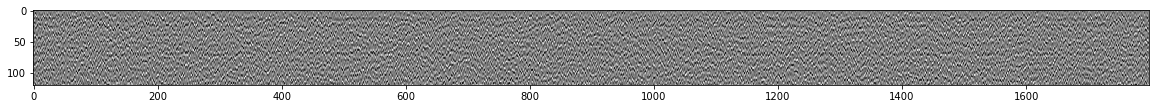

In [7]:
n1 = 600
n2 = 1799
n1_new = 150
f1_new = 30
n_elems = n1*n2
filename = "/var/tmp/villanueva/AI100_SI/M110_subcostfunc/convH_r150_tostack_agc.rsf@"
f = open(filename,"rb")
convH_comp_nonoise = np.reshape(struct.unpack('f'*n_elems,f.read(4*n_elems)),(n2,n1))[:,f1_new:n1_new]
plt.imshow(convH_comp_nonoise[:,:].transpose(),cmap='gray')
plt.show()

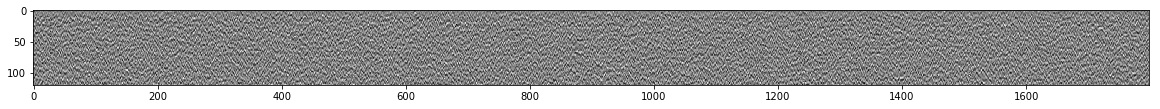

In [13]:
n1 = 600
n2 = 1799
n1_new = 150
f1_new = 30
n_elems = n1*n2
filename = "/var/tmp/villanueva/AI100_SI/M130_subCF_noise/convH_r150_tostack_agc.rsf@"
f = open(filename,"rb")
convH_comp = np.reshape(struct.unpack('f'*n_elems,f.read(4*n_elems)),(n2,n1))[:,f1_new:n1_new]
plt.imshow(convH_comp[:,:].transpose(),cmap='gray')
plt.show()

In [59]:
master_comp_df= pd.DataFrame(convH_comp[0])
master_comp_df['id'] = 0
print(master_comp_df.shape)
for ii in range(1,len(convH_comp[:,0])):
    temp_df = pd.DataFrame(convH_comp[ii])
    temp_df['id'] = ii
    master_comp_df = pd.DataFrame(np.vstack([master_comp_df,temp_df]))
print(master_comp_df.tail())

(120, 2)
               0       1
647875 -3.521136  5398.0
647876 -2.155726  5398.0
647877  0.084201  5398.0
647878  1.210111  5398.0
647879  1.013947  5398.0


In [60]:
%time X_comp = extract_features(master_comp_df,column_id=1,feature_extraction_settings=extraction_settings)
print(X_comp.shape)

Feature Extraction: 100%|██████████| 1/1 [07:13<00:00, 433.60s/it]


CPU times: user 1.39 s, sys: 352 ms, total: 1.74 s
Wall time: 7min 14s
(5399, 222)


In [62]:
print(np.sum(model.predict(X_comp)),len(model.predict(X_comp)))

4049.0 5399


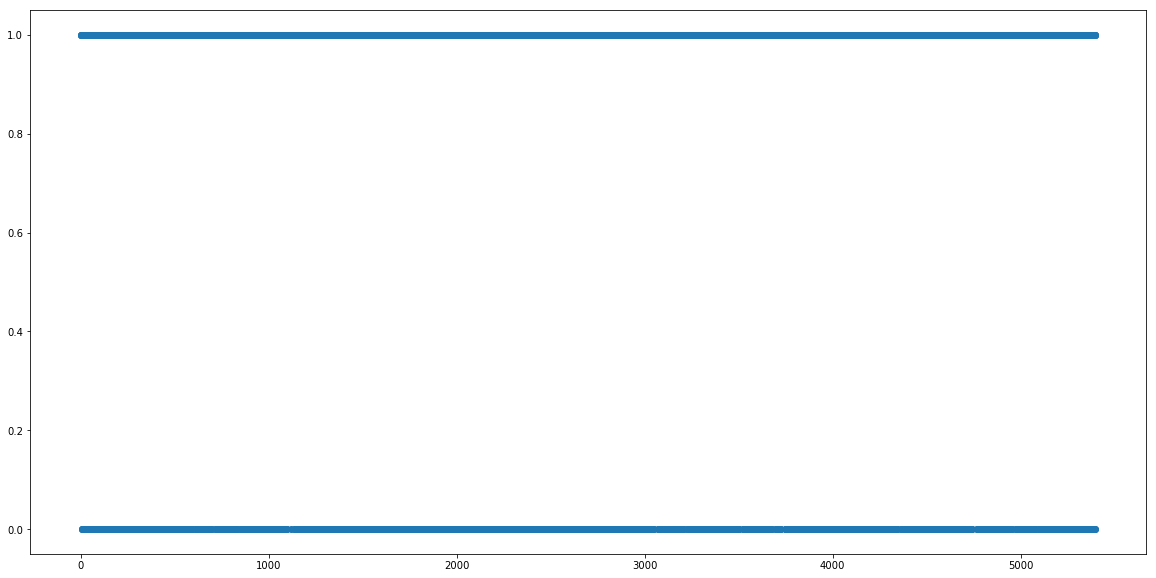

In [65]:
plt.plot(model.predict(X_comp),'o')
plt.show()

In [592]:
#plt.plot(np.sum(convH_comp[:,:150],axis=0))
#plt.show()

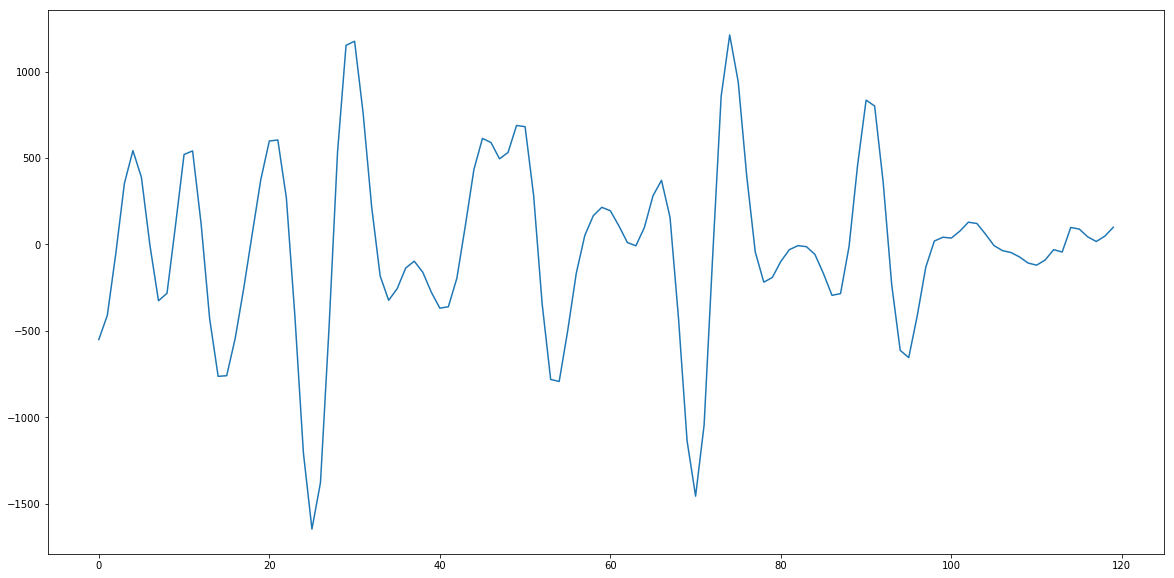

In [66]:
plt.plot(np.sum(convH_comp[:,:],axis=0))
plt.show()

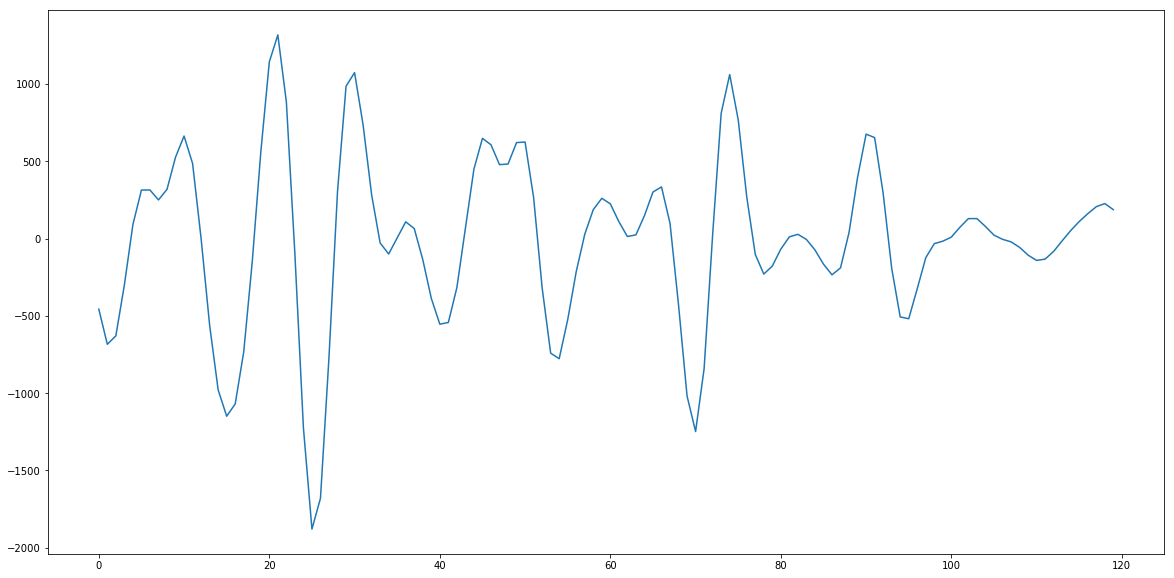

In [67]:
model_indices = np.array(model.predict(X_comp))
plt.plot(np.sum(convH_comp[ii,:] for ii in range(len(convH_comp[:,0])) if model_indices[ii]))
plt.show()

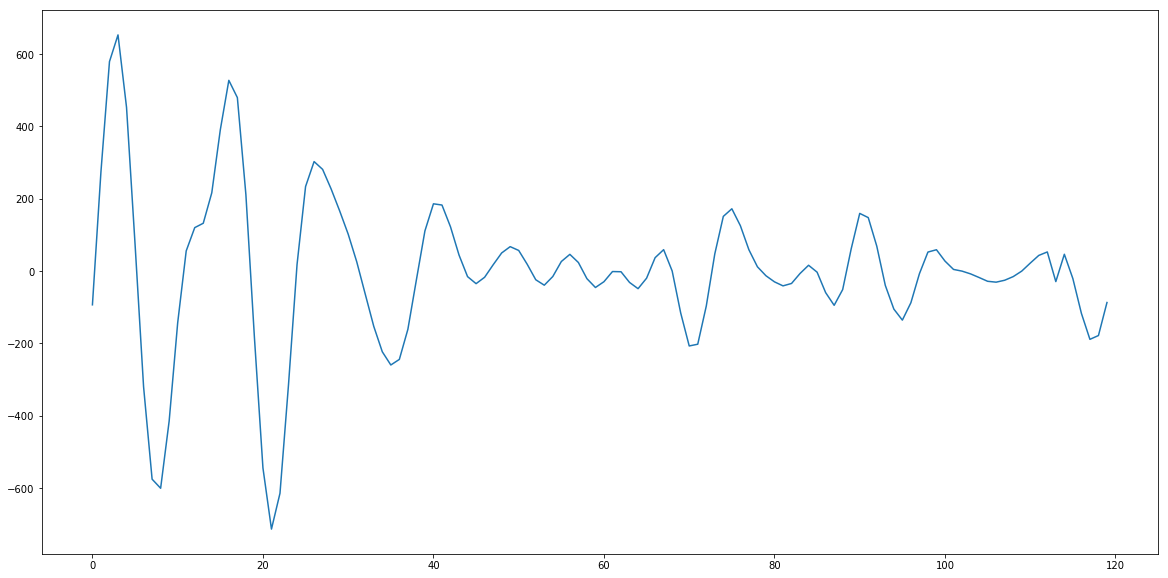

In [68]:
model_indices = np.array(model.predict(X_comp))
plt.plot(np.sum(convH_comp[ii,:] for ii in range(len(convH_comp[:,0])) if not model_indices[ii]))
plt.show()

In [25]:
f1 = 0
n1 = 120
stkH_comp = np.sum(convH_comp[:,f1:(f1+n1)],axis=0)/np.amax(np.sum(convH_comp[:,f1:(f1+n1)],axis=0))
stkH_comp_nonoise = np.sum(convH_comp_nonoise[:,f1:(f1+n1)],axis=0)/np.amax(np.sum(convH_comp_nonoise[:,f1:(f1+n1)],axis=0))

Model with noise variance of 1.e-14.

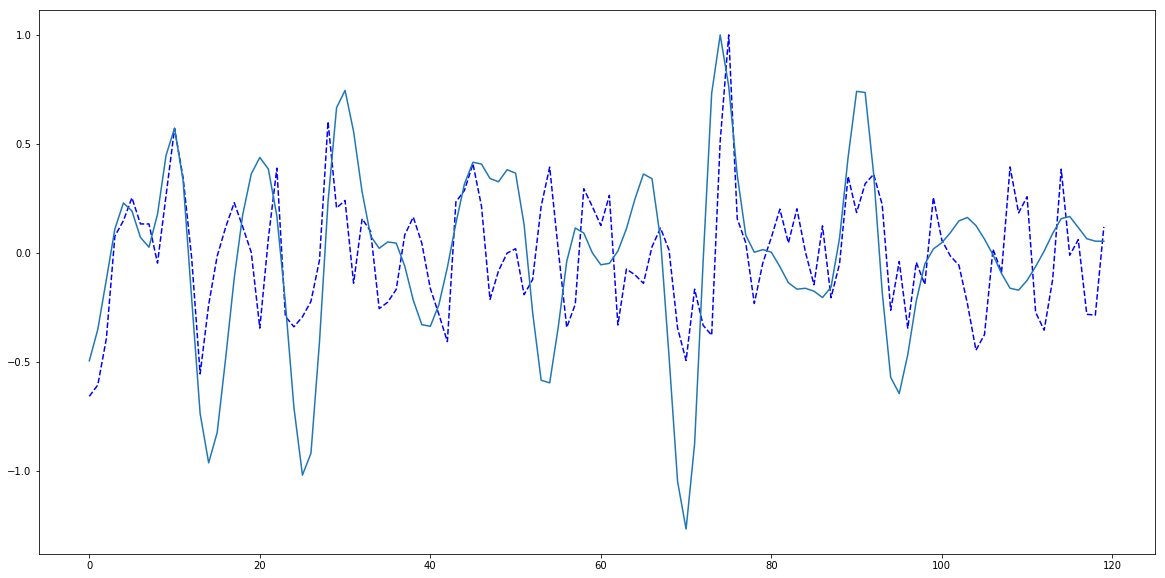

In [12]:

##model_indices = np.array(model.predict(X_comp))
#nn = len(convH_comp[:,0])
##nn = 800
##stkH_model = np.sum(convH_comp[ii,f1:(f1+n1)] for ii in range(nn) if model_indices[ii])
##stkH_nomodel = np.sum(convH_comp[ii,f1:(f1+n1)] for ii in range(nn) if not model_indices[ii])

##plt.plot(stkH_nomodel/np.amax(stkH_nomodel))
##plt.plot(stkH_model/np.amax(stkH_model))
#plt.plot(stkH_comp,'b--')
#plt.plot(stkH_comp_nonoise)
#plt.show()

Model with noise variance of 1e-15

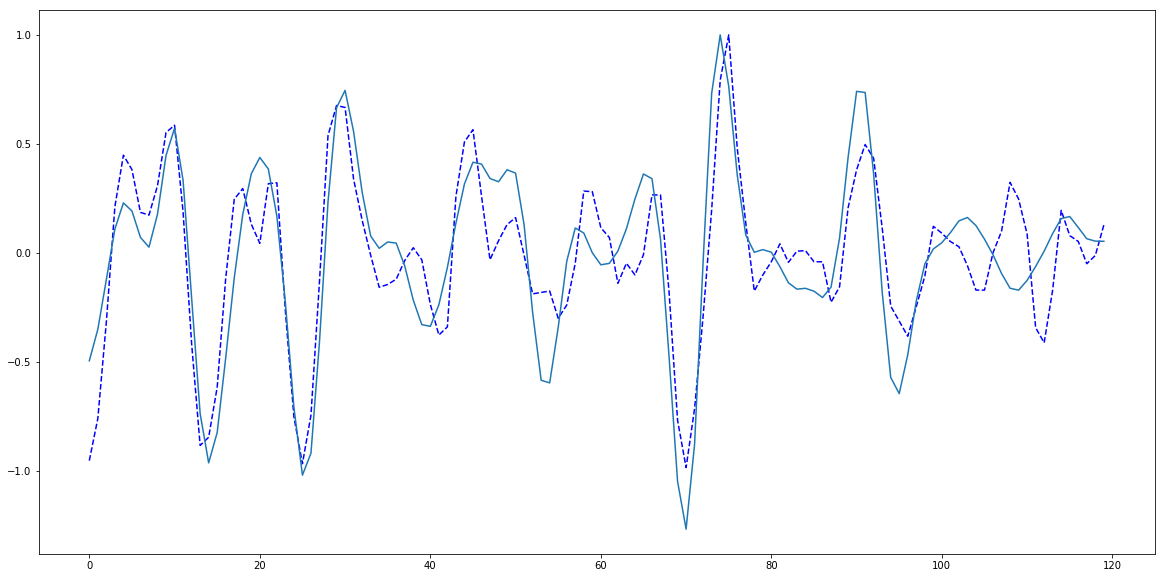

In [26]:
#model_indices = np.array(model.predict(X_comp))
nn = len(convH_comp[:,0])
#nn = 800
#stkH_model = np.sum(convH_comp[ii,f1:(f1+n1)] for ii in range(nn) if model_indices[ii])
#stkH_nomodel = np.sum(convH_comp[ii,f1:(f1+n1)] for ii in range(nn) if not model_indices[ii])

#plt.plot(stkH_nomodel/np.amax(stkH_nomodel))
#plt.plot(stkH_model/np.amax(stkH_model))
plt.plot(stkH_comp,'b--')
plt.plot(stkH_comp_nonoise)
plt.show()

In [27]:
#print(np.sum(np.square(np.subtract((stkH_nomodel/np.amax(stkH_nomodel)),stkH_comp))))
#print(np.sum(np.square(np.subtract((stkH_model/np.amax(stkH_model)),stkH_comp))))
print(np.sum(np.square(np.subtract(stkH_comp,stkH_comp_nonoise))))
print(np.sum(np.square(np.subtract(stkH_comp_nonoise,stkH_comp_nonoise))))

5.82327240837
0.0


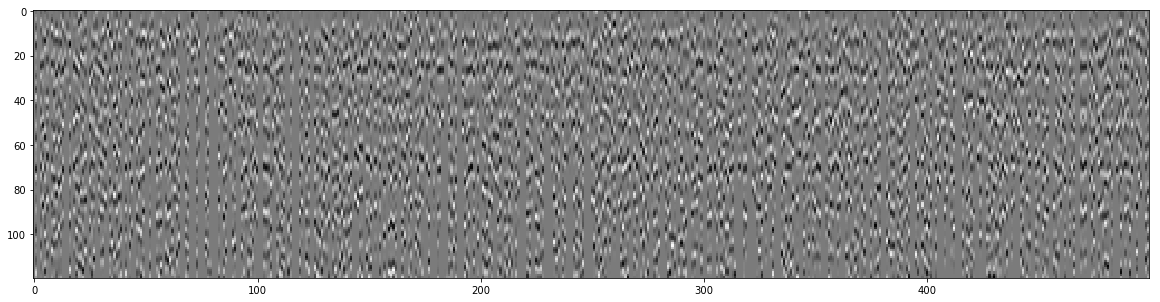

In [95]:
convH_model = np.array([convH_comp[ii,f1:(f1+n1)] for ii in range(nn) if model_indices[ii]])
plt.imshow(convH_model[:500,:].transpose(),cmap='gray')
plt.show()

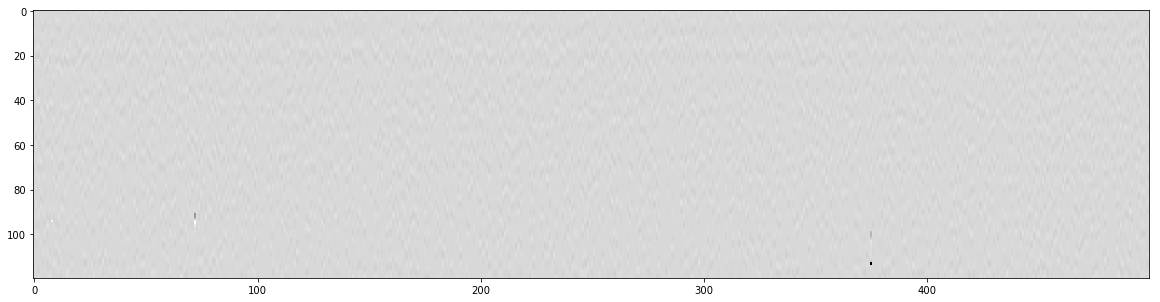

In [94]:
convH_nomodel = np.array([convH_comp[ii,f1:(f1+n1)] for ii in range(nn) if not model_indices[ii]])
plt.imshow(convH_nomodel[:500,:].transpose(),cmap='gray')
plt.show()

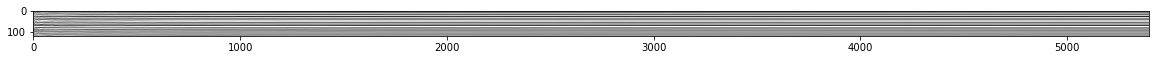

In [96]:
#print(len(convH_comp[:,0]))
nrand = len(convH_comp[:,0])
#nrand = 200
list_torand = list(range(len(convH_comp[:,0])))
list_rand = []
list_rand_model = []
list_rand_nomodel = []
sum_convH_rand = np.zeros((convH_comp[0].size,nrand))
subs_convRand_stk = np.zeros((convH_comp[0].size,nrand))
sum_model_rand = np.zeros((convH_comp[0].size,nrand))
subs_modelRand_stk = np.zeros((convH_comp[0].size,nrand))
sum_nomodel_rand = np.zeros((convH_comp[0].size,nrand))
subs_nomodelRand_stk = np.zeros((convH_comp[0].size,nrand))
for it in range(nrand):
    it_rand = list_torand[np.random.randint(0,len(list_torand))]
    list_torand.remove(it_rand)
    list_rand.append(it_rand)
    temp_sum = np.sum(convH_comp[list_rand,f1:f1+n1],axis=0)
    sum_convH_rand[:,it] = sum_convH_rand[:,it] + temp_sum/np.amax(temp_sum)
    subs_convRand_stk[:,it] = sum_convH_rand[:,it] - stkH_comp
    if model_indices[it_rand]:
        list_rand_model.append(it_rand)
        temp_sum_model = np.sum(convH_comp[list_rand_model,f1:f1+n1],axis=0)
        sum_model_rand[:,it] = sum_model_rand[:,it] + temp_sum_model/np.amax(temp_sum_model)
        if it != 0:
            sum_nomodel_rand[:,it] = sum_nomodel_rand[:,it-1]
        else:
            sum_nomodel_rand[:,it] = 0
    else:
        list_rand_nomodel.append(it_rand)
        temp_sum_nomodel = np.sum(convH_comp[list_rand_nomodel,f1:f1+n1],axis=0)
        sum_nomodel_rand[:,it] = sum_nomodel_rand[:,it] + temp_sum_nomodel/np.amax(temp_sum_nomodel)
        if it != 0:
            sum_model_rand[:,it] = sum_model_rand[:,it-1]
        else:
            sum_model_rand[:,it] = 0
    subs_modelRand_stk[:,it] = sum_model_rand[:,it] - stkH_comp
    subs_nomodelRand_stk[:,it] = sum_nomodel_rand[:,it] - stkH_comp
plt.imshow(sum_convH_rand,cmap='gray')
plt.show()
#print(list_rand)

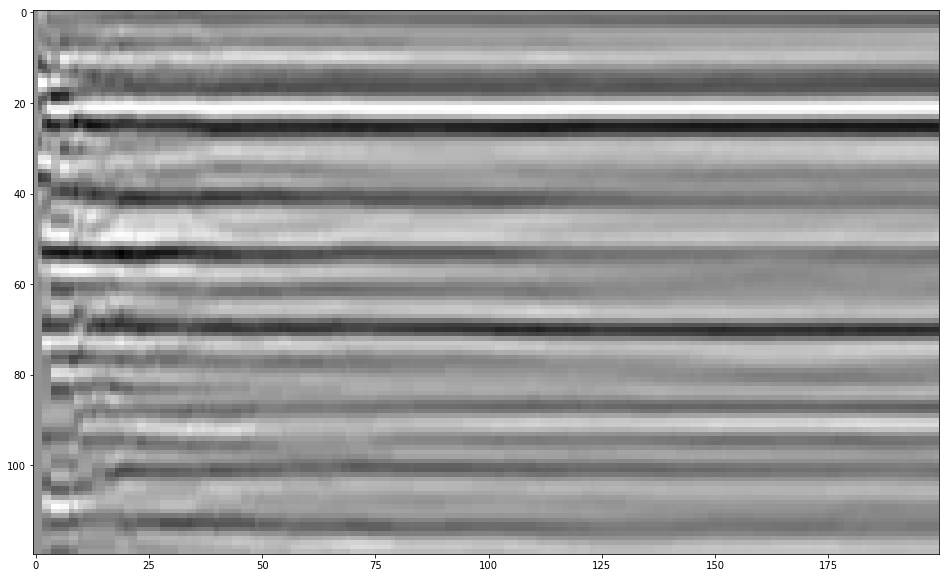

In [86]:
plt.imshow(sum_model_rand,cmap='gray')
plt.show()

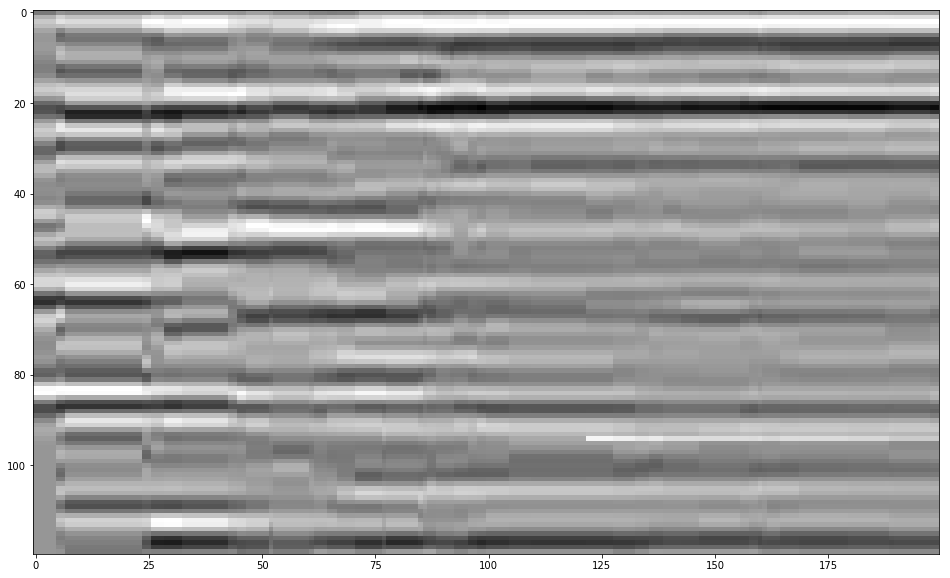

In [87]:
plt.imshow(sum_nomodel_rand,cmap='gray')
plt.show()

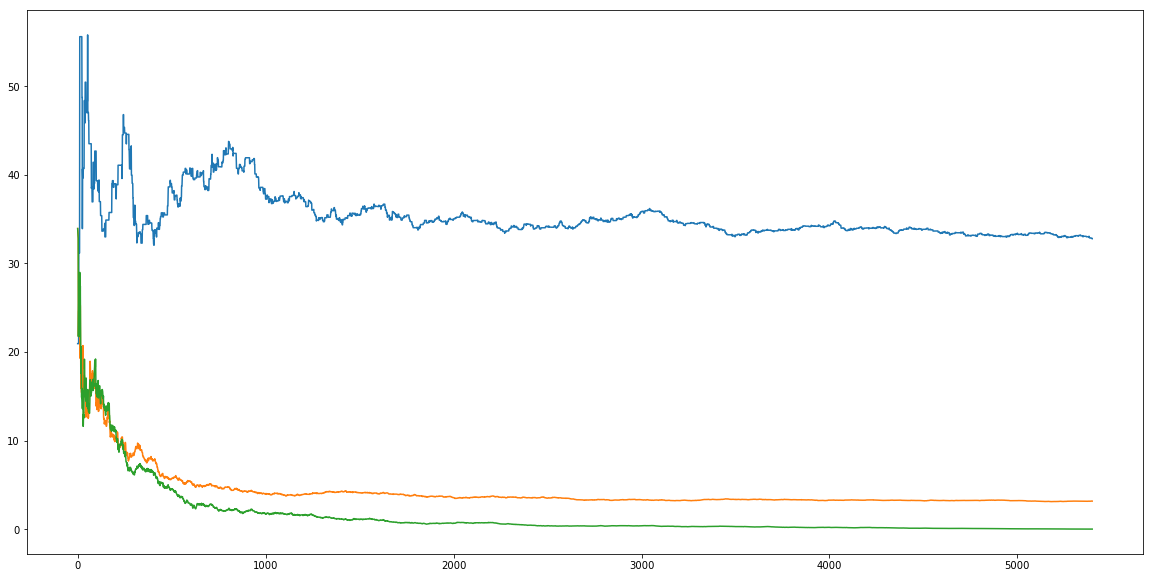

4049.0


In [97]:
plt.plot(np.sum(np.square(subs_nomodelRand_stk),axis=0))
plt.plot(np.sum(np.square(subs_modelRand_stk),axis=0))
plt.plot(np.sum(np.square(subs_convRand_stk),axis=0))
plt.show()
print(np.sum(model_indices))

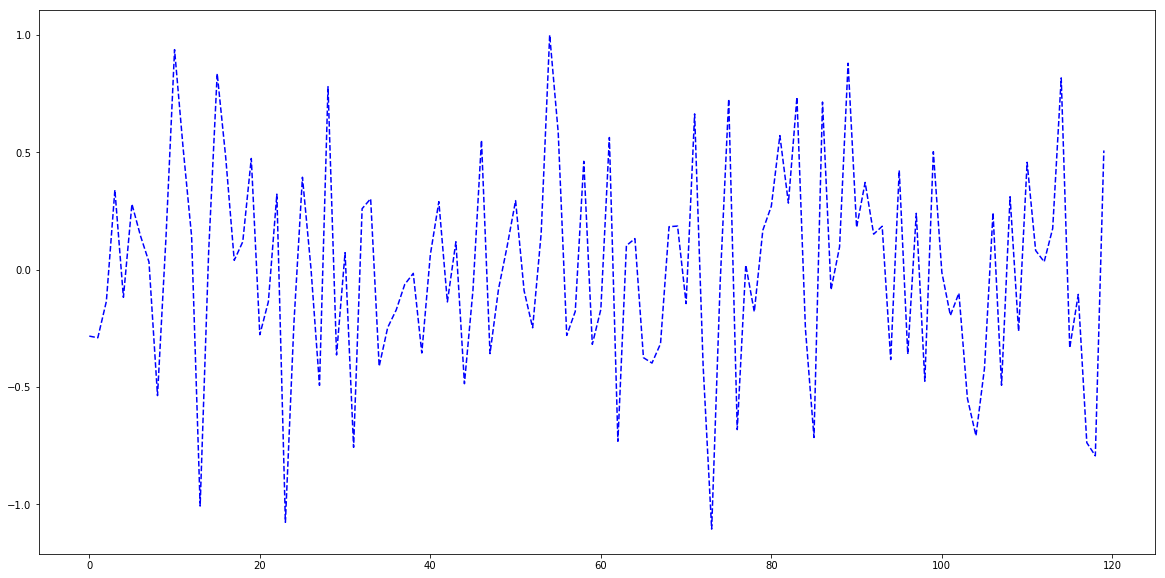

In [6]:
#plt.plot(sum_nomodel_rand[:,-1:])
#plt.plot(sum_model_rand[:,-1:])
#plt.plot(sum_convH_rand[:,-1:])
plt.plot(stkH_comp,'b--')
plt.show()